### WeatherPy

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [48]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "standard"
# Just for testing use limited cities
cities = [ "London", "Paris", "New York", "Darwin", "Bumblebazooooooooz"]
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold reponse info
temp = []
humidity = []
clouds = []
wind = []
date = []
#cityid = []
country = []
newcity = []
newlat = []
newlng = []
count = 1
# city  = "butaritari"
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        #cityid.append(count)
        newcity.append(city)
        newlat.append(response['coord']['lat'])
        newlng.append(response['coord']['lon'])
        print(f'Processing Record {count}: | {city}')
        count += 1
    except:
        print(f'The city cannot be processed')
        pass


Processing Record 1: | London
Processing Record 2: | Paris
Processing Record 3: | New York
Processing Record 4: | Darwin
The city cannot be processed


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
# Create DataFrame
WeatherData = pd.DataFrame({"City": newcity,
                          "Cloudiness": clouds,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": newlat,
                          "Lng": newlng,
                          "Max_Temp": temp,
                          "Wind Speed": wind})

#Export as CSV
WeatherData.to_csv(output_data_file)

# Display DataFrame
WeatherData

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind Speed
0,London,92,GB,1608066076,94,51.51,-0.13,282.04,3.11
1,Paris,20,FR,1608065993,93,48.85,2.35,281.48,2.60
2,New York,1,US,1608066003,38,40.71,-74.01,278.15,4.10
3,Darwin,20,AU,1608065825,94,-12.46,130.84,298.15,0.35


In [56]:
WeatherData.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max_Temp,Wind Speed
count,4.00000,4.000000e+00,4.000000,4.000000,4.000000,4.00000,4.000000
mean,33.25000,1.608066e+09,79.750000,32.152500,14.762500,284.95500,2.540000
std,40.17773,1.061552e+02,27.837325,30.094436,85.108557,8.96268,1.587262
min,1.00000,1.608066e+09,38.000000,-12.460000,-74.010000,278.15000,0.350000
25%,15.25000,1.608066e+09,79.250000,27.417500,-18.600000,280.64750,2.037500
50%,20.00000,1.608066e+09,93.500000,44.780000,1.110000,281.76000,2.855000
75%,38.00000,1.608066e+09,94.000000,49.515000,34.472500,286.06750,3.357500
max,92.00000,1.608066e+09,94.000000,51.510000,130.840000,298.15000,4.100000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
WeatherData = WeatherData[WeatherData["Humidity"] <= 100]
WeatherData.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max_Temp,Wind Speed
count,4.00000,4.000000e+00,4.000000,4.000000,4.000000,4.00000,4.000000
mean,33.25000,1.608066e+09,79.750000,32.152500,14.762500,284.95500,2.540000
std,40.17773,1.061552e+02,27.837325,30.094436,85.108557,8.96268,1.587262
min,1.00000,1.608066e+09,38.000000,-12.460000,-74.010000,278.15000,0.350000
25%,15.25000,1.608066e+09,79.250000,27.417500,-18.600000,280.64750,2.037500
50%,20.00000,1.608066e+09,93.500000,44.780000,1.110000,281.76000,2.855000
75%,38.00000,1.608066e+09,94.000000,49.515000,34.472500,286.06750,3.357500
max,92.00000,1.608066e+09,94.000000,51.510000,130.840000,298.15000,4.100000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

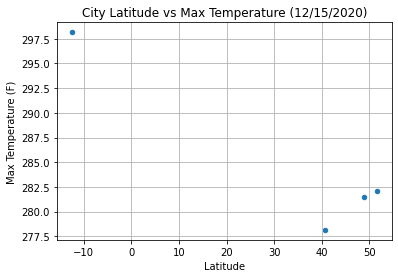

In [66]:
# Time code Unix...consider update
lattemp = WeatherData.plot(kind="scatter", x = 'Lat', y = 'Max_Temp',title = "City Latitude vs Max Temperature (12/15/2020)", grid = True)
lattemp.set_xlabel("Latitude")
lattemp.set_ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

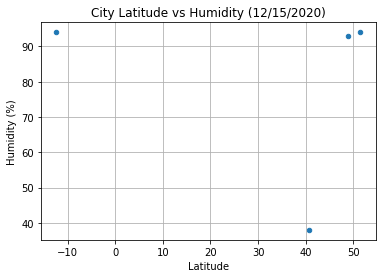

In [69]:
# Time code Unix...consider update
lathum = WeatherData.plot(kind="scatter", x = 'Lat', y = 'Humidity',title = "City Latitude vs Humidity (12/15/2020)", grid = True)
lathum.set_xlabel("Latitude")
lathum.set_ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

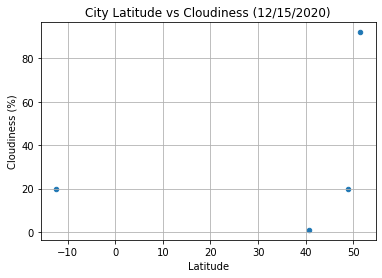

In [71]:
# Time code Unix...consider update
latclo = WeatherData.plot(kind="scatter", x = 'Lat', y = 'Cloudiness',title = "City Latitude vs Cloudiness (12/15/2020)", grid = True)
latclo.set_xlabel("Latitude")
latclo.set_ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot


Text(0, 0.5, 'Wind Speed (mph)')

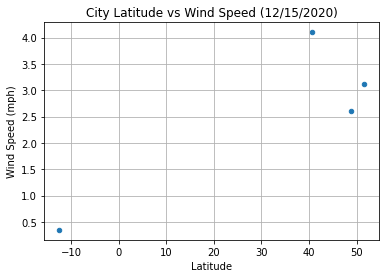

In [72]:
# Time code Unix...consider update
latwin = WeatherData.plot(kind="scatter", x = 'Lat', y = 'Wind Speed',title = "City Latitude vs Wind Speed (12/15/2020)", grid = True)
latwin.set_xlabel("Latitude")
latwin.set_ylabel("Wind Speed (mph)")

## Linear Regression

In [74]:
# Create Hemisphere DFs
north = WeatherData[WeatherData["Lat"] > 0]
south = WeatherData[WeatherData["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

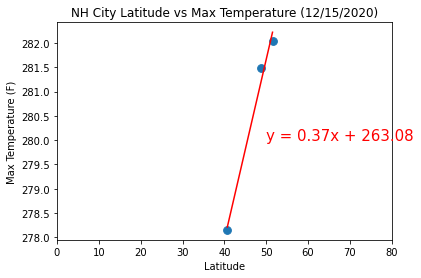

In [83]:
# Using the Grouped DF above, create variables to be used in correlation and as axes in plotting
nlats = north["Lat"]
ntemps = north["Max_Temp"]
# Using the linregress module from Scipy Stats, assign values to variables related to linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlats,ntemps)
# Create variable for the formula serving as y=mx+b for the linear regression
regress_values = nlats * slope + intercept
# Create variable for the text to explain the y=mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(nlats,ntemps, s = 60)
# Plot the line "regress_values" to visually represent the linear regression
plt.plot(nlats,regress_values,"r-")
# Plot the formula of the line in text
plt.annotate(line_eq,(50,280),fontsize=15,color="red")
# Plot the labels for axes/title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("NH City Latitude vs Max Temperature (12/15/2020)")
# Set the limits of the plot
plt.xlim(0,80)

# Display the plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\littl\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\littl\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\littl\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


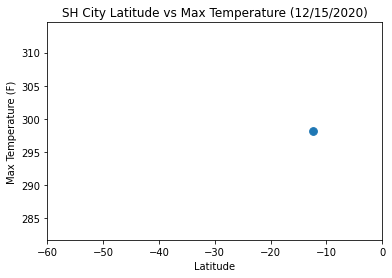

In [85]:
# Using the Grouped DF above, create variables to be used in correlation and as axes in plotting
slats = south["Lat"]
stemps = south["Max_Temp"]
# Using the linregress module from Scipy Stats, assign values to variables related to linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(slats,stemps)
# Create variable for the formula serving as y=mx+b for the linear regression
regress_values = slats * slope + intercept
# Create variable for the text to explain the y=mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(slats,stemps, s = 60)
# Plot the line "regress_values" to visually represent the linear regression
plt.plot(slats,regress_values,"r-")
# Plot the formula of the line in text
plt.annotate(line_eq,(-50,280),fontsize=15,color="red")
# Plot the labels for axes/title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("SH City Latitude vs Max Temperature (12/15/2020)")
# Set the limits of the plot
plt.xlim(-60,0)

# Display the plot
plt.show()